In [109]:
#Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for ploting things
import seaborn as sns #more plots
import sklearn
from datetime import datetime, date
from plotly.offline import iplot
from sklearn.impute import SimpleImputer

In [110]:
Training = pd.read_csv("Training.csv", low_memory = False)

In [111]:
Training[Training.columns[Training.isna().any()]]

,db_annualsales,db_city,db_companyname,db_country,db_state,db_employeerange,db_accountwatch,db_audience,db_subindustry,highest_prodA_edition,...,channel_support_total,new_segment,hyperthreading_active_flag,hv_replay_capable_flag,ftr_first_date_hol_page_view,ftr_first_date_eval_page_view,ftr_first_date_seminar_page_view,ftr_first_date_webinar_page_view,ftr_first_date_whitepaper_download,ftr_first_date_any_download
0,5500000.0,Wuhan,Emagine Concept Inc,US,CA,Very Small,NaN,Wireless->Mobile Network,Equipment & Services,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Depok,Pt Indonesia Comnets Plus,ID,30,NaN,NaN,SOHO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SK Telecom,KR,NaN,NaN,NaN,Wireless->Mobile Network,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Khabarovsk,Pacific National University,RU,30,NaN,NaN,Education->University,University,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Hebei,China Telecom hebei,CN,10,NaN,NaN,Wireless->Mobile Network,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50001,2080000.0,Cartersville,University System of Georgia,US,GA,Very Small,NaN,Education->University,University,-1.0,...,0.000000,Very Small SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50002,NaN,Hove,Brighton Build IT Ltd,GB,BNH,NaN,NaN,SMB->Construction,Contractors,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50003,3824000.0,Stockholm,Epm Data AB,SE,AB,Very Small,NaN,SMB->Software & Technology,Data & Technical Services,-1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50004,NaN,Fortaleza,Empresa De Tecnologia Da Informacao Do Ceara-e...,BR,06,NaN,NaN,SOHO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
#There are columns that have NA only in the values (100% missing). Therefore, those columns are not useful for modelling. 
#Dropping those columns
Training = Training.drop(['gu_ind_vmw_major_lookup','gu_ind_vmw_sub_category'],axis=1)

In [113]:
#Drop the cols that have high percentage missing (70% above data are missing)

Training = Training.drop(['highest_prodA_edition','total_prodD_booking_amount','total_prodG_booking_amount',
                          'total_prodT_license_booking_amount','total_prodH_booking_amount','total_prodJ_booking_amount',
                          'total_prodT_booking_amount','total_prodN_booking_amount','total_prodO_booking_amount',
                          'total_prodC_booking_amount','total_prodF_booking_amount','total_prodA_ent_plus_booking_amount',
                          'total_prodB_booking_amount','total_prodA_ent_booking_amount','total_prodA_booking_amount',
                          'total_prodA_std_booking_amount','total_prodA_5_x_booking_amount','total_prodN_license_booking_amount'],axis=1)

In [114]:
#Drop the one with date. 
#We already have dummy variables column that indicate 0/1 for viewing or not.
Training = Training.drop(['ftr_first_date_webinar_page_view','ftr_first_date_eval_page_view','ftr_first_date_seminar_page_view',
                          'ftr_first_date_whitepaper_download','ftr_first_date_any_download','ftr_first_date_hol_page_view'],axis=1)

In [115]:
#channel_direct_total, channel_partner_total, channel_web_total, channel_oem_total, channel_support_total
#We have a channel_total column and total_pct columns. When above columns are NA, the total_pct = 0 (i.e. channel_direct_total = NA,
# channel_direct_total_pct = 0. Same for other columns). Therefore, we are changing those NA values to 0 

cols = ['channel_direct_total','channel_partner_total','channel_web_total','channel_oem_total','channel_support_total']
Training[cols] = Training[cols].fillna(value=0)

In [116]:
#Categorial columns that have NA: change the NA to Unknown
cols = ['db_city','db_companyname','db_country','db_state','db_employeerange','db_accountwatch','db_audience','db_subindustry',
        'iso_country_dunssite','region_dunssite','sic_2_description','sic_4_description','gu_city','gu_state','gu_iso_country_name',
        'gu_country_region','gu_country_geo','gu_annual_sales_usd','gu_num_of_employees','final_vertical_gu','gu_sic_2_description', 
        'gu_sic_4_description','final_vertical_dunssite','hv_replay_capable_flag','new_segment','gu_emp_segment','geo_dunssite',
        'hyperthreading_active_flag']
Training[cols] = Training[cols].fillna('Unknown')

In [117]:
#Account watch has value called null:null:null:null, which doesn't represent anything. Therefore, we replace it with Unknown as well
Training['db_accountwatch'].replace('null:null:null:null','Unknown')

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
50001    Unknown
50002    Unknown
50003    Unknown
50004    Unknown
50005    Unknown
Name: db_accountwatch, Length: 50006, dtype: object

In [118]:
#Drop the categorial variables
Training = Training.drop(['db_industry', 'db_city','db_companyname', 'db_country', 'db_state', 'db_employeerange', 'db_accountwatch', 
                          'db_audience','db_subindustry', 'iso_country_dunssite', 'region_dunssite', 'geo_dunssite', 
                          'sic_2_description', 'sic_4_description', 'gu_city','gu_state', 'gu_iso_country_name', 'gu_country_region', 
                          'gu_country_geo', 'gu_annual_sales_usd', 'gu_num_of_employees','final_vertical_gu',  'gu_sic_2_description', 
                          'gu_sic_4_description', 'gu_emp_segment', 'gu_emp_segment_desc', 'final_vertical_dunssite', 'idc_verticals', 
                          'new_segment'],axis=1)

In [119]:
#Create dummy for 'hyperthreading_active_flag', 'hv_replay_capable_flag'
Training = pd.get_dummies(data=Training, columns=['hyperthreading_active_flag', 'hv_replay_capable_flag'])

In [120]:
#db_annualsales is missing around 64% (32K/50K). We are using mean-impute to calculate teh missing value. New column 
#(db_annualsales_impute) indicates whether the value is imputed or not (1 = imputed; 0 = not imputed)
Training['db_annualsales_impute'] = Training['db_annualsales'].apply(lambda x: 0 if pd.isna(x) else 1)
#Training['db_annualsales_impute']

In [121]:
#Per FQA, impute annualsales with mean 
Training['db_annualsales'].fillna((Training['db_annualsales'].mean()), inplace=True)

In [122]:
#Double check if there's any other missing value. 
Training[Training.columns[Training.isna().any()]]

""
0
1
2
3
4
...
50001
50002
50003
50004


In [123]:
#Find the columns that have same values for every single row. Drop those as those columns might not be helpful for the model
list_duplicate_col = []
for i in Training:
    if (Training[i] == Training[i][0]).all():
        list_duplicate_col.append(i)

#Uncomment list_duplicate_col to see all the columns that have same value        
#list_duplicate_col
Training = Training.drop(list_duplicate_col, axis=1)

In [124]:
#Per FAQ A1, we don't know what the other numbers represent. We can treat the non zero one as 1 to the target value.
#check_more_num = list(Training.columns[Training.isin([2]).any()] )
#check_more_num
#Training[Training.target != 0] = 1

In [125]:
#tot_page_views_l30d, tot_page_views_l90d drop cuz we have tot_page_views. And those are highly correlated (Over 90%)
#Same for tot_visits_l30d and tot_visits_l90d. Dropping those as we have tot_visits

#Uncomment following if you want to remove the ones that are highly-correlated.
#Training = Training.drop(['tot_page_views_l30d','tot_page_views_l90d','tot_visits_l30d', 'tot_visits_l90d'],axis=1)

In [126]:
checktype = list(Training.select_dtypes(include=['object']).columns)
checktype
#['db_industry', 'db_city','db_companyname', 'db_country', 'db_state', 'db_employeerange', 'db_accountwatch', 'db_audience',
# 'db_subindustry', 'iso_country_dunssite', 'region_dunssite', 'geo_dunssite', 'sic_2_description', 'sic_4_description', 'gu_city',
# 'gu_state', 'gu_iso_country_name', 'gu_country_region', 'gu_country_geo', 'gu_annual_sales_usd', 'gu_num_of_employees',
# 'final_vertical_gu',  'gu_sic_2_description', 'gu_sic_4_description', 'gu_emp_segment', 'gu_emp_segment_desc',
# 'final_vertical_dunssite', 'idc_verticals', 'new_segment', 'hyperthreading_active_flag', 'hv_replay_capable_flag']

[]

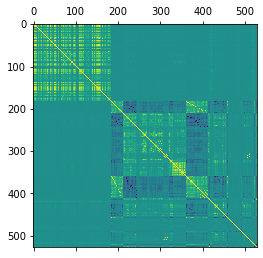

In [127]:
plt.matshow(Training.corr())
plt.show()

In [128]:
Training

,Unnamed: 0,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,log_in_events,internal_search_events,internal_campaign_events,...,tgt_first_date_any_download,tgt_more_than1,target,hyperthreading_active_flag_N,hyperthreading_active_flag_Unknown,hyperthreading_active_flag_Y,hv_replay_capable_flag_N,hv_replay_capable_flag_Unknown,hv_replay_capable_flag_Y,db_annualsales_impute
0,3,7,0,5,3,0,2,7,0,0,...,0,0,0,0,1,0,0,1,0,1
1,5,16,0,16,1,0,1,16,0,0,...,0,0,0,0,1,0,0,1,0,0
2,6,4,0,4,2,0,2,4,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8,19,19,19,8,8,8,17,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11,12,12,12,1,1,1,12,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50001,199981,21,0,0,2,0,0,21,0,0,...,0,0,0,0,1,0,0,1,0,1
50002,199982,10,0,0,1,0,0,10,0,0,...,0,0,0,0,1,0,0,1,0,0
50003,199986,3,0,0,1,0,0,3,0,0,...,0,0,0,0,1,0,0,1,0,1
50004,199989,49,0,0,11,0,0,43,1,0,...,0,0,0,0,1,0,0,1,0,0


In [129]:
corr_mat = Training.corr()
#print(corr_mat)
#corr_mat.to_csv('corr_mat2.csv',index=False)

In [130]:
#Check skewness
dic_skew = dict(Training.skew(axis='index',numeric_only=True))
#dic_skew
skew_greater_than_100 = dict((k, v) for k, v in dic_skew.items() if v >= 100)
skew_greater_than_100

#Negative skewness is all small 
#Should we apply filter on following columns?

{'tot_page_views': 112.36219267578811,
 'tot_page_views_l90d': 108.86389368680753,
 'tot_visits': 118.70770203019424,
 'tot_visits_l30d': 116.5594665640628,
 'tot_visits_l90d': 119.75064984138993,
 'log_in_events': 115.7991200091507,
 'internal_search_events': 116.42089944685428,
 'internal_campaign_events': 111.8000444544222,
 'find_retailer_events': 223.62021375537591,
 'product_view_events': 112.26740440038634,
 'cart_remove_events': 201.66369676171092,
 'cart_view_events': 124.64323077853126,
 'checkout_s1_events': 112.37062614209394,
 'purchase_events': 112.46693155800263,
 'survey_display_events': 129.09944461541374,
 'survey_submit_events': 180.0079197048234,
 'natural_search_events': 103.91169698317292,
 'file_download_events': 125.72296656487563,
 'tot_google_browser_page_views': 117.6772182584939,
 'tot_mozilla_browser_page_views': 106.0340166821415,
 'tot_microsoft_browser_page_views': 161.9038622644954,
 'tot_apple_browser_page_views': 102.33858091438421,
 'tot_opera_browse

In [131]:
#Drop the one that have outliers
Trainfilt = Training[Training['internal_search_events'] >= 301].index
Trainfilt2 = Training[Training['cart_remove_events'] > 50].index
Trainfilt3 = Training[Training['tot_aol_se_page_views'] > 90].index
Trainfilt4 = Training[Training['paid_social_views'] > 30].index

In [132]:
Training.drop(Trainfilt, inplace=True)
Training.drop(Trainfilt2, inplace=True)
Training.drop(Trainfilt3, inplace=True)
Training.drop(Trainfilt4, inplace=True)

KeyError: '[32601] not found in axis'

In [133]:
print(Training.filter(like='prodA').columns)
#keep all the total, and drop everything else for prodA
#prodA_5_x_2013_bookings_amount, prodA_5_x_2014_bookings_amount, prodA_5_x_2015_bookings_amount -> keep total_prodA_booking_amount

Index(['num_prodA_editions_distinct', 'days_bw_prodA_launch_and_purch',
       'days_bw_prodA_5_x_launch_and_purch', 'prodA_qty',
       'days_bw_prodA_std_launch_and_purch',
       'days_bw_prodA_ent_launch_and_purch',
       'days_bw_prodA_ent_plus_launch_and_purch', 'flag_prodA_customer',
       'flag_prodA_5_x_customer', 'flag_prodA_5_x_mdm',
       'flag_prodA_std_customer', 'flag_prodA_ent_customer',
       'flag_prodA_ent_plus_customer', 'prodA_std_2013_bookings_amount',
       'prodA_std_2014_bookings_amount', 'prodA_std_2015_bookings_amount',
       'prodA_ent_2013_bookings_amount', 'prodA_ent_2014_bookings_amount',
       'prodA_ent_2015_bookings_amount', 'prodA_ent_plus_2013_bookings_amount',
       'prodA_ent_plus_2014_bookings_amount',
       'prodA_ent_plus_2015_bookings_amount', 'prodA_2013_bookings_amount',
       'prodA_2014_bookings_amount', 'prodA_2015_bookings_amount',
       'prodA_5_x_2013_bookings_amount', 'prodA_5_x_2014_bookings_amount',
       'prodA_5_x_2015_

In [134]:
Training.to_csv('training_v2.csv',index=False)

In [135]:
#for x in Training['target']:
#    if x > 0:
#       Training['new_target']=1
#    elif x == 0: 
#       Training['new_target'] = 0

In [136]:
Training['new_target'] = Training['target'].apply(lambda x: 0 if x==0 else 1)

In [137]:
Training['new_target'].nunique()

2

In [138]:
Training.to_csv('training_v2_new_target.csv',index=False)

# Validation Data

In [139]:
Validation = pd.read_csv("Validation.csv", low_memory = False)

In [140]:
Validation = Validation.drop(['gu_ind_vmw_major_lookup','gu_ind_vmw_sub_category'],axis=1)

In [141]:
Validation = Validation.drop(['highest_prodA_edition','total_prodD_booking_amount','total_prodG_booking_amount',
                          'total_prodT_license_booking_amount','total_prodH_booking_amount','total_prodJ_booking_amount',
                          'total_prodT_booking_amount','total_prodN_booking_amount','total_prodO_booking_amount',
                          'total_prodC_booking_amount','total_prodF_booking_amount','total_prodA_ent_plus_booking_amount',
                          'total_prodB_booking_amount','total_prodA_ent_booking_amount','total_prodA_booking_amount',
                          'total_prodA_std_booking_amount','total_prodA_5_x_booking_amount','total_prodN_license_booking_amount'],axis=1)

In [142]:
Validation = Validation.drop(['ftr_first_date_webinar_page_view','ftr_first_date_eval_page_view','ftr_first_date_seminar_page_view',
                          'ftr_first_date_whitepaper_download','ftr_first_date_any_download','ftr_first_date_hol_page_view'],axis=1)

In [143]:
cols = ['channel_direct_total','channel_partner_total','channel_web_total','channel_oem_total','channel_support_total']
Validation[cols] = Validation[cols].fillna(value=0)

In [144]:
cols = ['db_city','db_companyname','db_country','db_state','db_employeerange','db_accountwatch','db_audience','db_subindustry',
        'iso_country_dunssite','region_dunssite','sic_2_description','sic_4_description','gu_city','gu_state','gu_iso_country_name',
        'gu_country_region','gu_country_geo','gu_annual_sales_usd','gu_num_of_employees','final_vertical_gu','gu_sic_2_description', 
        'gu_sic_4_description','final_vertical_dunssite','hv_replay_capable_flag','new_segment','gu_emp_segment','geo_dunssite',
        'hyperthreading_active_flag']
Validation[cols] = Validation[cols].fillna('Unknown')

In [145]:
Validation['db_accountwatch'].replace('null:null:null:null','Unknown')

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
50001    Unknown
50002    Unknown
50003    Unknown
50004    Unknown
50005    Unknown
Name: db_accountwatch, Length: 50006, dtype: object

In [146]:
Validation = Validation.drop(['db_industry', 'db_city','db_companyname', 'db_country', 'db_state', 'db_employeerange', 'db_accountwatch', 
                          'db_audience','db_subindustry', 'iso_country_dunssite', 'region_dunssite', 'geo_dunssite', 
                          'sic_2_description', 'sic_4_description', 'gu_city','gu_state', 'gu_iso_country_name', 'gu_country_region', 
                          'gu_country_geo', 'gu_annual_sales_usd', 'gu_num_of_employees','final_vertical_gu',  'gu_sic_2_description', 
                          'gu_sic_4_description', 'gu_emp_segment', 'gu_emp_segment_desc', 'final_vertical_dunssite', 'idc_verticals', 
                          'new_segment'],axis=1)

In [147]:
Validation = pd.get_dummies(data=Validation, columns=['hyperthreading_active_flag', 'hv_replay_capable_flag'])

In [148]:
Validation['db_annualsales_impute'] = Validation['db_annualsales'].apply(lambda x: 0 if pd.isna(x) else 1)

In [149]:
Validation['db_annualsales'].fillna((Validation['db_annualsales'].mean()), inplace=True)

In [150]:
Validation[Validation.columns[Validation.isna().any()]]

""
0
1
2
3
4
...
50001
50002
50003
50004


In [151]:
#Find the columns that have same values for every single row. Drop those as those columns might not be helpful for the model
list_duplicate_col = []
for i in Validation:
    if (Validation[i] == Validation[i][0]).all():
        list_duplicate_col.append(i)

#Uncomment list_duplicate_col to see all the columns that have same value        
#list_duplicate_col
Validation = Validation.drop(list_duplicate_col, axis=1)

In [152]:
checktype = list(Validation.select_dtypes(include=['object']).columns)
checktype

[]

In [153]:
Validfilt =  Validation[Validation['internal_search_events'] >= 301].index
Validfilt2 = Validation[Validation['cart_remove_events'] > 50].index
Validfilt3 = Validation[Validation['tot_aol_se_page_views'] > 90].index
Validfilt4 = Validation[Validation['paid_social_views'] > 30].index

In [154]:
Validation.to_csv('validation_v2.csv',index=False)

In [155]:
#for x in Validation['target']:
#    if x > 0:
#        Validation['new_target']=1
#    else: 
#        Validation['new_target'] = 0

In [156]:
Validation['new_target'] = Validation['target'].apply(lambda x: 0 if x==0 else 1)

In [157]:
Validation.to_csv('validation_v2_new_target.csv',index=False)

# Data Training

In [158]:
Training =pd.read_csv("training_v2_new_target.csv")

In [159]:
Training = Training.drop("target",axis=1)

In [160]:
x_Training = Training.drop(['tgt_first_date_hol_page_view'
                          ,'tgt_first_date_eval_page_view'
                          ,'tgt_first_date_webinar_page_view'
                          ,'tgt_first_date_whitepaper_download'
                          ,'tgt_first_date_any_download'
                          ,'tgt_more_than1'],axis=1)

y_Training = Training['new_target']

In [163]:
Validation = pd.read_csv("validation_v2_new_target.csv")

In [164]:
Validation = Validation.drop("target",axis=1)

In [165]:
x_Validation = Validation.drop(['tgt_first_date_hol_page_view'
                          ,'tgt_first_date_eval_page_view'
                          ,'tgt_first_date_webinar_page_view'
                          ,'tgt_first_date_whitepaper_download'
                          ,'tgt_first_date_any_download'
                          ,'tgt_more_than1'],axis=1)

y_Validation = Validation['new_target']

In [166]:
#X = Training_1.drop('new_target',axis=1)
#y = Training_1['new_target']

NameError: name 'Training_1' is not defined

In [167]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_Training, y_Training)

RandomForestClassifier(n_estimators=200)

In [168]:
rfc_pred = rfc.predict(x_Validation)

In [169]:
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
print(confusion_matrix(y_Validation, rfc_pred))
print('\n')
print(classification_report(y_Validation, rfc_pred))

[[47516  1085]
 [    0  1405]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     48601
           1       0.56      1.00      0.72      1405

    accuracy                           0.98     50006
   macro avg       0.78      0.99      0.86     50006
weighted avg       0.99      0.98      0.98     50006



In [171]:
print(confusion_matrix(y_Validation, rfc_pred))

[[47516  1085]
 [    0  1405]]
